<a href="https://colab.research.google.com/github/waswapeter/Adam/blob/main/Adam_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
import pandas as pd

# Replace the URL below with the raw link to your CSV file on GitHub
github_csv_url = 'https://raw.githubusercontent.com/waswapeter/Adam/main/Prepared_Data_with_FuelBurn.csv'

data =pd.read_csv(github_csv_url)
data.head()

,Date,AirCraft_Type,AirCraft_Regn,AirCraft_FltNo,From,To,Total_Payload_kg,Distance_Flown_km,Hours_Flown,Fuel_Burn_kg_Payload,Fuel_Burn_kg_Time
0,1/1/2021,C208,5Y-ESU,MAF 1,JUBA,TONJ,834.0,419.0,1.6,139.7784,352.0
1,1/1/2021,C208,5Y-ESU,MAF 1,TONJ,JUBA,878.0,419.0,1.6,147.1528,352.0
2,1/3/2021,C208,5Y-ESU,MAF 1,JUBA,KAPOETA,1019.0,220.0,0.9,89.6720,198.0
3,1/3/2021,C208,5Y-ESU,MAF 1,KAPOETA,JUBA,1163.0,220.0,0.9,102.3440,198.0
4,1/3/2021,C208,5Y-ESU,MAF 1,JUBA,KAPOETA,987.0,220.0,0.9,86.8560,198.0


In [ ]:
import pymannkendall as mk

unique_flt_nos = data['AirCraft_FltNo'].unique()

print("Mann-Kendall Test Results for Daily Fuel Burn (Payload-Based):")

for flt_no in unique_flt_nos:
    filtered_data = data[data['AirCraft_FltNo'] == flt_no].copy()

    # Ensure the data is sorted by date for time series analysis
    filtered_data = filtered_data.sort_values(by='Date')

    # Perform the Mann-Kendall test
    # We use the 'theil-sen' method to also get the Sen's slope (t-value)
    mk_result = mk.original_test(filtered_data['Fuel_Burn_kg_Payload'], alpha=0.05)


    print(f"\nAirCraft_FltNo: {flt_no}")
    print(f"  Z-value: {mk_result.z:.4f}")
    print(f"  p-value: {mk_result.p:.4f}")
    print(f"  Trend: {mk_result.trend}")
    print(f"  Sen's slope: {mk_result.slope:.4f}")

Mann-Kendall Test Results for Daily Fuel Burn (Payload-Based):

AirCraft_FltNo: MAF 1
  Z-value: 2.3201
  p-value: 0.0203
  Trend: increasing
  Sen's slope: 0.0033

AirCraft_FltNo: MAF 2
  Z-value: -0.3639
  p-value: 0.7159
  Trend: no trend
  Sen's slope: -0.0009

AirCraft_FltNo: MAF 3
  Z-value: -2.8537
  p-value: 0.0043
  Trend: decreasing
  Sen's slope: -0.0048

AirCraft_FltNo: MAF 4
  Z-value: 0.0217
  p-value: 0.9827
  Trend: no trend
  Sen's slope: 0.0001

AirCraft_FltNo: MAF 5
  Z-value: -3.7699
  p-value: 0.0002
  Trend: decreasing
  Sen's slope: -0.0074

AirCraft_FltNo: MAF 6
  Z-value: -0.8276
  p-value: 0.4079
  Trend: no trend
  Sen's slope: -0.0014

AirCraft_FltNo: MAF 7
  Z-value: 0.8551
  p-value: 0.3925
  Trend: no trend
  Sen's slope: 0.0081

AirCraft_FltNo: MAF 7 
  Z-value: -1.0445
  p-value: 0.2963
  Trend: no trend
  Sen's slope: -33.8624

AirCraft_FltNo: MAF 8
  Z-value: -2.0329
  p-value: 0.0421
  Trend: decreasing
  Sen's slope: -0.0039


In [ ]:
import pymannkendall as mk

unique_flt_nos = data['AirCraft_FltNo'].unique()

print("Mann-Kendall Test Results for Daily Fuel Burn (Flighttime-Based):")

for flt_no in unique_flt_nos:
    filtered_data = data[data['AirCraft_FltNo'] == flt_no].copy()

    # Ensure the data is sorted by date for time series analysis
    filtered_data = filtered_data.sort_values(by='Date')

    # Perform the Mann-Kendall test
    # We use the 'theil-sen' method to also get the Sen's slope (t-value)
    mk_result = mk.original_test(filtered_data['Fuel_Burn_kg_Time'], alpha=0.05)


    print(f"\nAirCraft_FltNo: {flt_no}")
    print(f"  Z-value: {mk_result.z:.4f}")
    print(f"  p-value: {mk_result.p:.4f}")
    print(f"  Trend: {mk_result.trend}")
    print(f"  Sen's slope: {mk_result.slope:.4f}")

Mann-Kendall Test Results for Daily Fuel Burn (Flighttime-Based):

AirCraft_FltNo: MAF 1
  Z-value: 3.4152
  p-value: 0.0006
  Trend: increasing
  Sen's slope: 0.0000

AirCraft_FltNo: MAF 2
  Z-value: -0.1798
  p-value: 0.8573
  Trend: no trend
  Sen's slope: 0.0000

AirCraft_FltNo: MAF 3
  Z-value: -2.5963
  p-value: 0.0094
  Trend: decreasing
  Sen's slope: 0.0000

AirCraft_FltNo: MAF 4
  Z-value: 0.3922
  p-value: 0.6949
  Trend: no trend
  Sen's slope: 0.0000

AirCraft_FltNo: MAF 5
  Z-value: -2.7543
  p-value: 0.0059
  Trend: decreasing
  Sen's slope: 0.0000

AirCraft_FltNo: MAF 6
  Z-value: 0.3242
  p-value: 0.7458
  Trend: no trend
  Sen's slope: 0.0000

AirCraft_FltNo: MAF 7
  Z-value: 1.4864
  p-value: 0.1372
  Trend: no trend
  Sen's slope: 0.0000

AirCraft_FltNo: MAF 7 
  Z-value: -1.0445
  p-value: 0.2963
  Trend: no trend
  Sen's slope: -88.0000

AirCraft_FltNo: MAF 8
  Z-value: -1.6886
  p-value: 0.0913
  Trend: no trend
  Sen's slope: 0.0000


# Task
Summarize by Aircraft_FltNo against Fuel_Burn_kg_Payload and make a bargraph indicating total Fuel_Burn_kg_Payload across years

## Extract year

### Subtask:
Extract the year from the 'Date' column and create a new column for it.


**Reasoning**:
Convert the 'Date' column to datetime objects and extract the year into a new column.



In [41]:
data['Date'] = pd.to_datetime(data['Date'])
data['Year'] = data['Date'].dt.year
data.head()

,Date,AirCraft_Type,AirCraft_Regn,AirCraft_FltNo,From,To,Total_Payload_kg,Distance_Flown_km,Hours_Flown,Fuel_Burn_kg_Payload,Fuel_Burn_kg_Time,Year
0,2021-01-01,C208,5Y-ESU,MAF 1,JUBA,TONJ,834.0,419.0,1.6,139.7784,352.0,2021
1,2021-01-01,C208,5Y-ESU,MAF 1,TONJ,JUBA,878.0,419.0,1.6,147.1528,352.0,2021
2,2021-01-03,C208,5Y-ESU,MAF 1,JUBA,KAPOETA,1019.0,220.0,0.9,89.6720,198.0,2021
3,2021-01-03,C208,5Y-ESU,MAF 1,KAPOETA,JUBA,1163.0,220.0,0.9,102.3440,198.0,2021
4,2021-01-03,C208,5Y-ESU,MAF 1,JUBA,KAPOETA,987.0,220.0,0.9,86.8560,198.0,2021


## Aggregate yearly fuel burn

### Subtask:
Group the data by 'AirCraft_FltNo' and 'Year' and sum the 'Fuel_Burn_kg_Payload' to get the total yearly fuel burn for each flight number.


**Reasoning**:
Group the data by 'AirCraft_FltNo' and 'Year' and sum the 'Fuel_Burn_kg_Payload' to get the total yearly fuel burn for each flight number, then reset the index.



In [42]:
yearly_fuel_burn = data.groupby(['AirCraft_FltNo', 'Year'])['Fuel_Burn_kg_Payload'].sum().reset_index()
display(yearly_fuel_burn.head())

,AirCraft_FltNo,Year,Fuel_Burn_kg_Payload
0,MAF 1,2021,42682.1772
1,MAF 1,2022,43630.8488
2,MAF 1,2023,40256.3640
3,MAF 1,2024,38337.3316
4,MAF 2,2021,32894.4924


## Create bar graph

### Subtask:
Create a bar graph showing the total 'Fuel_Burn_kg_Payload' for each 'AirCraft_FltNo' across the years.


**Reasoning**:
Create a bar plot to visualize the total yearly fuel burn for each aircraft flight number using the aggregated data.



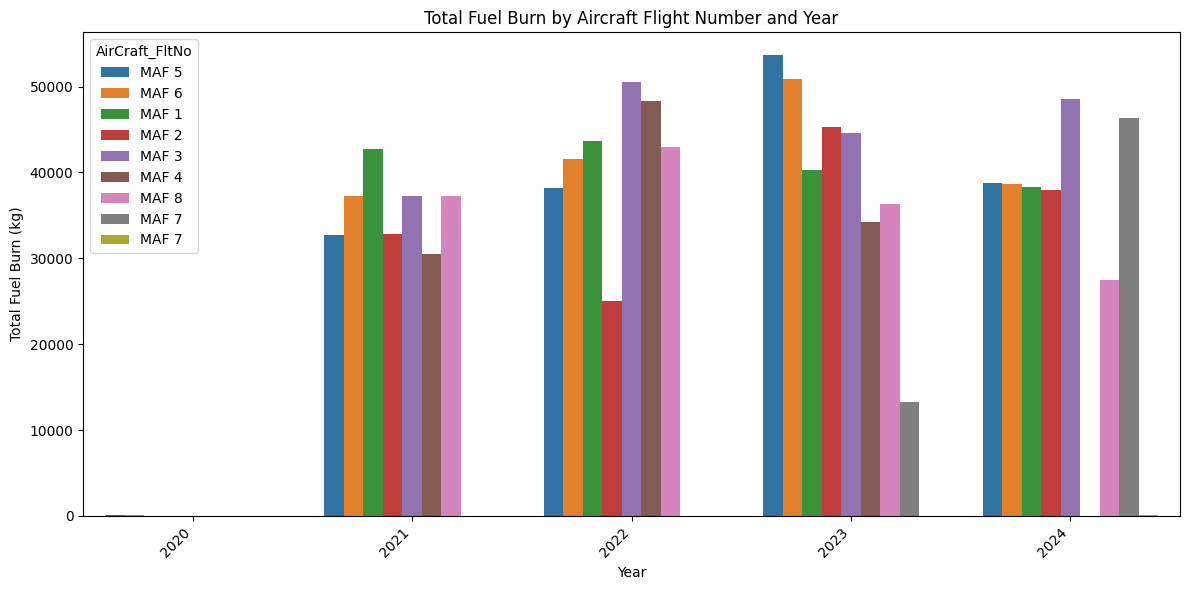

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.barplot(x='Year', y='Fuel_Burn_kg_Payload', hue='AirCraft_FltNo', data=yearly_fuel_burn)
plt.title('Total Fuel Burn by Aircraft Flight Number and Year')
plt.xlabel('Year')
plt.ylabel('Total Fuel Burn (kg)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Summary:

### Data Analysis Key Findings

* The total fuel burn per flight number per year was calculated by grouping the data by `AirCraft_FltNo` and `Year` and summing the `Fuel_Burn_kg_Payload`.
* A bar graph was generated to visualize the total fuel burn for each aircraft flight number across the years, allowing for a comparison of fuel consumption trends per flight over time.

### Insights or Next Steps

* Analyze the generated bar graph to identify any trends or significant changes in fuel consumption for specific aircraft flight numbers over the years.
* Further investigation could be done to understand the reasons behind any observed variations in fuel burn for different flight numbers or across different years.


# Task
Analyze the provided flight data to compute the total yearly fuel burn for each aircraft flight number using the 'Fuel_Burn_kg_Payload' column, excluding data from the year 2020. Summarize the results by 'AirCraft_FltNo' and create a bar graph visualizing the total 'Fuel_Burn_kg_Payload' across the years for each flight number.

## Filter data

### Subtask:
Filter the data to exclude rows where the year is 2020.


**Reasoning**:
Filter the data to exclude rows where the year is 2020 and store the result in a new DataFrame.



In [44]:
filtered_data = data[data['Year'] != 2020].copy()
display(filtered_data.head())

,Date,AirCraft_Type,AirCraft_Regn,AirCraft_FltNo,From,To,Total_Payload_kg,Distance_Flown_km,Hours_Flown,Fuel_Burn_kg_Payload,Fuel_Burn_kg_Time,Year
0,2021-01-01,C208,5Y-ESU,MAF 1,JUBA,TONJ,834.0,419.0,1.6,139.7784,352.0,2021
1,2021-01-01,C208,5Y-ESU,MAF 1,TONJ,JUBA,878.0,419.0,1.6,147.1528,352.0,2021
2,2021-01-03,C208,5Y-ESU,MAF 1,JUBA,KAPOETA,1019.0,220.0,0.9,89.6720,198.0,2021
3,2021-01-03,C208,5Y-ESU,MAF 1,KAPOETA,JUBA,1163.0,220.0,0.9,102.3440,198.0,2021
4,2021-01-03,C208,5Y-ESU,MAF 1,JUBA,KAPOETA,987.0,220.0,0.9,86.8560,198.0,2021


## Aggregate yearly fuel burn

### Subtask:
Group the filtered data by 'AirCraft_FltNo' and 'Year' and sum the 'Fuel_Burn_kg_Payload' to get the total yearly fuel burn for each flight number.


**Reasoning**:
Group the filtered data by 'AirCraft_FltNo' and 'Year' and sum the 'Fuel_Burn_kg_Payload' to get the total yearly fuel burn for each flight number, then reset the index and display the head.



In [45]:
yearly_fuel_burn_filtered = filtered_data.groupby(['AirCraft_FltNo', 'Year'])['Fuel_Burn_kg_Payload'].sum().reset_index()
display(yearly_fuel_burn_filtered.head())

,AirCraft_FltNo,Year,Fuel_Burn_kg_Payload
0,MAF 1,2021,42682.1772
1,MAF 1,2022,43630.8488
2,MAF 1,2023,40256.3640
3,MAF 1,2024,38337.3316
4,MAF 2,2021,32894.4924


## Create bar graph

### Subtask:
Create a bar graph showing the total 'Fuel_Burn_kg_Payload' for each 'AirCraft_FltNo' across the years (excluding 2020).


**Reasoning**:
Create a bar plot to visualize the total yearly fuel burn for each aircraft flight number excluding 2020 using the aggregated data.



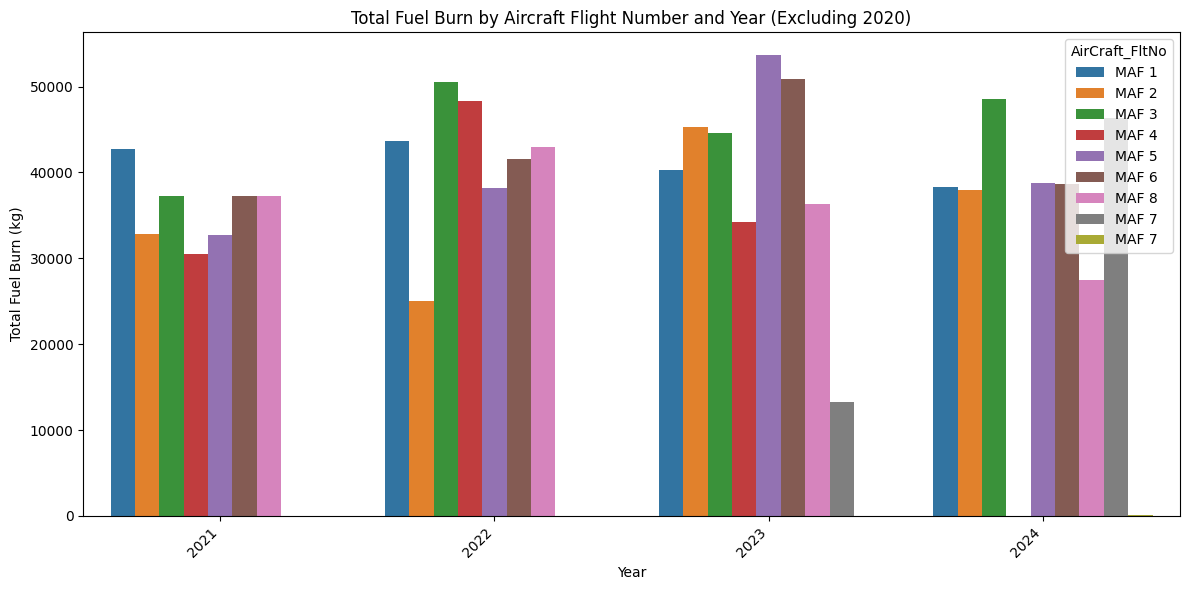

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.barplot(x='Year', y='Fuel_Burn_kg_Payload', hue='AirCraft_FltNo', data=yearly_fuel_burn_filtered)
plt.title('Total Fuel Burn by Aircraft Flight Number and Year (Excluding 2020)')
plt.xlabel('Year')
plt.ylabel('Total Fuel Burn (kg)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Summary:

### Data Analysis Key Findings

*   The data from 2020 was successfully excluded from the analysis.
*   The total yearly fuel burn for each aircraft flight number was calculated and aggregated.
*   A bar graph was generated to visualize the total fuel burn for each flight number across the years (excluding 2020), allowing for a visual comparison of fuel consumption trends.

### Insights or Next Steps

*   Analyze the trends in fuel burn for each flight number over the years to identify any significant increases or decreases.
*   Investigate the reasons behind variations in fuel burn for different flight numbers, such as route length, aircraft type, or operational efficiency.


## Clean 'AirCraft_FltNo'

### Subtask:
Remove any leading or trailing whitespace from the 'AirCraft_FltNo' column.

**Reasoning**:
Strip leading and trailing whitespace from the 'AirCraft_FltNo' column to ensure consistent naming and prevent duplicate entries like 'MAF 7' and 'MAF 7 '.

In [46]:
data['AirCraft_FltNo'] = data['AirCraft_FltNo'].str.strip()
display(data['AirCraft_FltNo'].unique())

array(['MAF 1', 'MAF 2', 'MAF 3', 'MAF 4', 'MAF 5', 'MAF 6', 'MAF 7',
       'MAF 8'], dtype=object)

## Extract year

### Subtask:
Extract the year from the 'Date' column and create a new column for it.

**Reasoning**:
Convert the 'Date' column to datetime objects and extract the year into a new column.

In [47]:
data['Date'] = pd.to_datetime(data['Date'])
data['Year'] = data['Date'].dt.year
display(data.head())

,Date,AirCraft_Type,AirCraft_Regn,AirCraft_FltNo,From,To,Total_Payload_kg,Distance_Flown_km,Hours_Flown,Fuel_Burn_kg_Payload,Fuel_Burn_kg_Time,Year
0,2021-01-01,C208,5Y-ESU,MAF 1,JUBA,TONJ,834.0,419.0,1.6,139.7784,352.0,2021
1,2021-01-01,C208,5Y-ESU,MAF 1,TONJ,JUBA,878.0,419.0,1.6,147.1528,352.0,2021
2,2021-01-03,C208,5Y-ESU,MAF 1,JUBA,KAPOETA,1019.0,220.0,0.9,89.6720,198.0,2021
3,2021-01-03,C208,5Y-ESU,MAF 1,KAPOETA,JUBA,1163.0,220.0,0.9,102.3440,198.0,2021
4,2021-01-03,C208,5Y-ESU,MAF 1,JUBA,KAPOETA,987.0,220.0,0.9,86.8560,198.0,2021


## Filter data

### Subtask:
Filter the data to exclude rows where the year is 2020.

**Reasoning**:
Filter the data to exclude rows where the year is 2020 and store the result in a new DataFrame.

In [48]:
filtered_data = data[data['Year'] != 2020].copy()
display(filtered_data.head())

,Date,AirCraft_Type,AirCraft_Regn,AirCraft_FltNo,From,To,Total_Payload_kg,Distance_Flown_km,Hours_Flown,Fuel_Burn_kg_Payload,Fuel_Burn_kg_Time,Year
0,2021-01-01,C208,5Y-ESU,MAF 1,JUBA,TONJ,834.0,419.0,1.6,139.7784,352.0,2021
1,2021-01-01,C208,5Y-ESU,MAF 1,TONJ,JUBA,878.0,419.0,1.6,147.1528,352.0,2021
2,2021-01-03,C208,5Y-ESU,MAF 1,JUBA,KAPOETA,1019.0,220.0,0.9,89.6720,198.0,2021
3,2021-01-03,C208,5Y-ESU,MAF 1,KAPOETA,JUBA,1163.0,220.0,0.9,102.3440,198.0,2021
4,2021-01-03,C208,5Y-ESU,MAF 1,JUBA,KAPOETA,987.0,220.0,0.9,86.8560,198.0,2021


## Aggregate yearly fuel burn

### Subtask:
Group the filtered data by 'AirCraft_FltNo' and 'Year' and sum the 'Fuel_Burn_kg_Payload' to get the total yearly fuel burn for each flight number.

**Reasoning**:
Group the filtered data by 'AirCraft_FltNo' and 'Year' and sum the 'Fuel_Burn_kg_Payload' to get the total yearly fuel burn for each flight number, then reset the index and display the head.

In [50]:
yearly_fuel_burn_filtered = filtered_data.groupby(['AirCraft_FltNo', 'Year'])['Fuel_Burn_kg_Payload'].sum().reset_index()
display(yearly_fuel_burn_filtered.head())

,AirCraft_FltNo,Year,Fuel_Burn_kg_Payload
0,MAF 1,2021,42682.1772
1,MAF 1,2022,43630.8488
2,MAF 1,2023,40256.3640
3,MAF 1,2024,38337.3316
4,MAF 2,2021,32894.4924


## Create bar graph

### Subtask:
Create a bar graph showing the total 'Fuel_Burn_kg_Payload' for each 'AirCraft_FltNo' across the years (excluding 2020).

**Reasoning**:
Create a bar plot to visualize the total yearly fuel burn for each aircraft flight number excluding 2020 using the aggregated data.

,AirCraft_FltNo,Year,Fuel_Burn_kg_Payload
0,MAF 1,2021,42682.1772
1,MAF 1,2022,43630.8488
2,MAF 1,2023,40256.3640
3,MAF 1,2024,38337.3316
4,MAF 2,2021,32894.4924


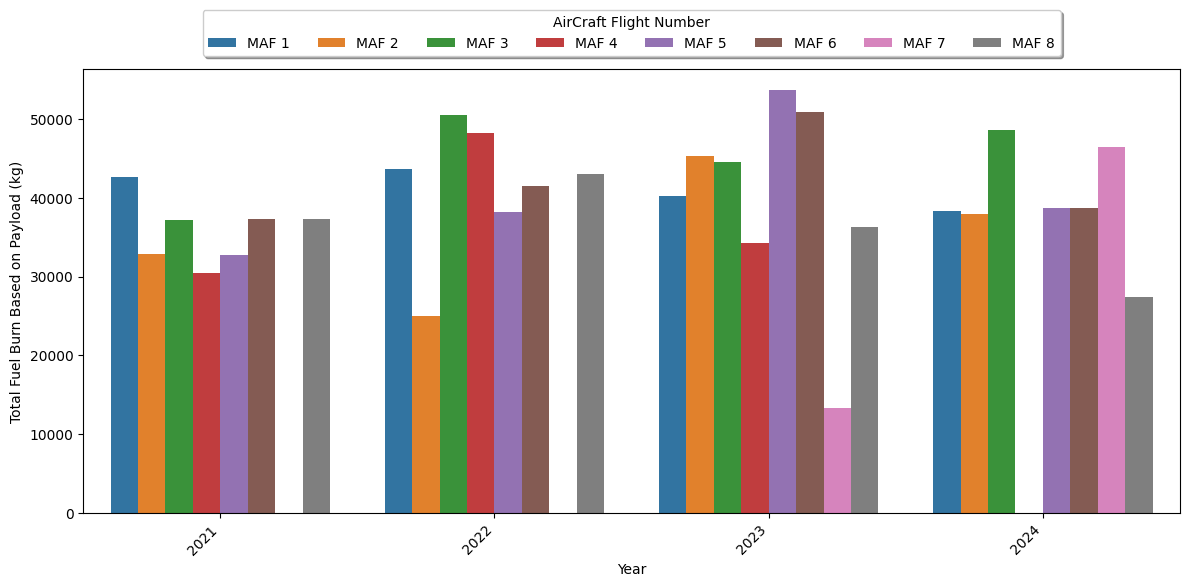

In [51]:
yearly_fuel_burn_filtered = filtered_data.groupby(['AirCraft_FltNo', 'Year'])['Fuel_Burn_kg_Payload'].sum().reset_index()
display(yearly_fuel_burn_filtered.head())

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd # Import pandas for CategoricalDtype

# Define the desired order for AirCraft_FltNo
flt_no_order = [f'MAF {i}' for i in range(1, 9)]

# Convert 'AirCraft_FltNo' to a categorical type with the specified order
yearly_fuel_burn_filtered['AirCraft_FltNo'] = pd.Categorical(
    yearly_fuel_burn_filtered['AirCraft_FltNo'], categories=flt_no_order, ordered=True
)

plt.figure(figsize=(12, 6))
sns.barplot(x='Year', y='Fuel_Burn_kg_Payload', hue='AirCraft_FltNo', data=yearly_fuel_burn_filtered, palette='tab10') # Changed palette to 'tab10' for clearer default-like colors
plt.xlabel('Year')
plt.ylabel('Total Fuel Burn Based on Payload (kg)')
plt.xticks(rotation=45, ha='right')

# Position the legend horizontally at the top of the plot
plt.legend(title='AirCraft Flight Number', loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=len(flt_no_order), fancybox=True, shadow=True)


plt.tight_layout()
plt.show()

,AirCraft_FltNo,Year,Fuel_Burn_kg_Time
0,MAF 1,2021,99550.0
1,MAF 1,2022,108944.0
2,MAF 1,2023,96822.0
3,MAF 1,2024,92818.0
4,MAF 2,2021,76454.4


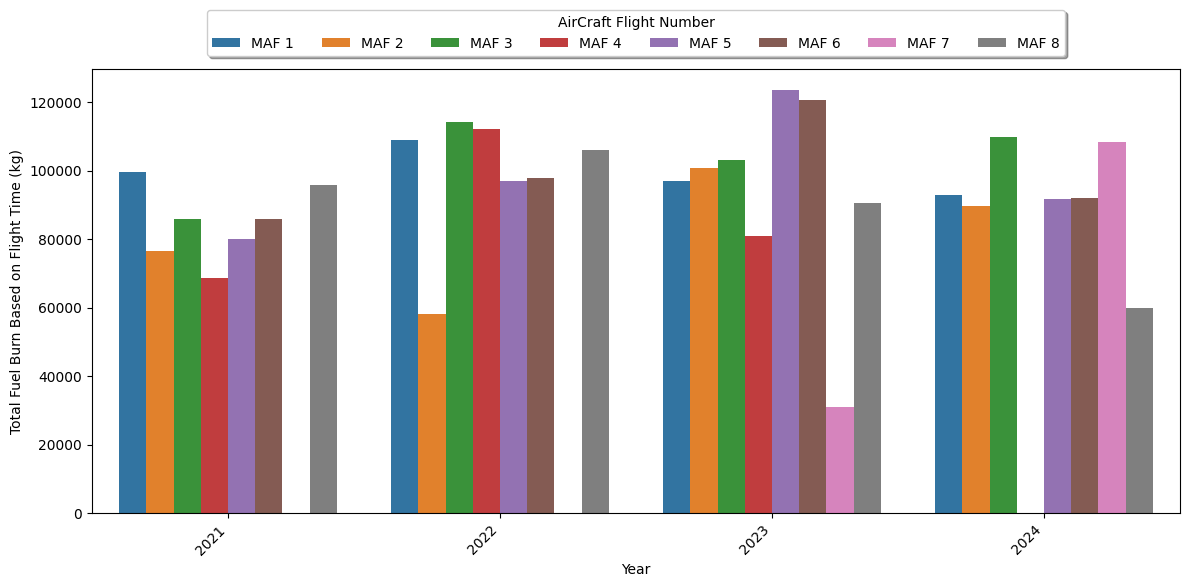

In [ ]:
yearly_fuel_burn_filtered = filtered_data.groupby(['AirCraft_FltNo', 'Year'])['Fuel_Burn_kg_Time'].sum().reset_index()
display(yearly_fuel_burn_filtered.head())

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd # Import pandas for CategoricalDtype

# Define the desired order for AirCraft_FltNo
flt_no_order = [f'MAF {i}' for i in range(1, 9)]

# Convert 'AirCraft_FltNo' to a categorical type with the specified order
yearly_fuel_burn_filtered['AirCraft_FltNo'] = pd.Categorical(
    yearly_fuel_burn_filtered['AirCraft_FltNo'], categories=flt_no_order, ordered=True
)

plt.figure(figsize=(12, 6))
sns.barplot(x='Year', y='Fuel_Burn_kg_Time', hue='AirCraft_FltNo', data=yearly_fuel_burn_filtered, palette='tab10') # Changed palette to 'tab10' for clearer default-like colors
plt.xlabel('Year')
plt.ylabel('Total Fuel Burn Based on Flight Time (kg)')
plt.xticks(rotation=45, ha='right')

# Position the legend horizontally at the top of the plot
plt.legend(title='AirCraft Flight Number', loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=len(flt_no_order), fancybox=True, shadow=True)


plt.tight_layout()
plt.show()

# Task
Summarize total yearly Fuel_Burn_kg_Payload and total yearly Fuel_Burn_kg_Time against each AirCraft_FltNo and Year, and include descriptive statistics.

## Aggregate yearly fuel burn (payload)

### Subtask:
Group the data by 'AirCraft_FltNo' and 'Year' and sum the 'Fuel_Burn_kg_Payload' to get the total yearly payload-based fuel burn for each flight number.


**Reasoning**:
Group the data by 'AirCraft_FltNo' and 'Year' and sum the 'Fuel_Burn_kg_Payload' to get the total yearly fuel burn for each flight number, then reset the index and display the head.



In [52]:
yearly_fuel_burn_payload = data.groupby(['AirCraft_FltNo', 'Year'])['Fuel_Burn_kg_Payload'].sum().reset_index()
display(yearly_fuel_burn_payload.head())

,AirCraft_FltNo,Year,Fuel_Burn_kg_Payload
0,MAF 1,2021,42682.1772
1,MAF 1,2022,43630.8488
2,MAF 1,2023,40256.3640
3,MAF 1,2024,38337.3316
4,MAF 2,2021,32894.4924


## Aggregate yearly fuel burn (time)

### Subtask:
Group the data by 'AirCraft_FltNo' and 'Year' and sum the 'Fuel_Burn_kg_Time' to get the total yearly time-based fuel burn for each flight number.


**Reasoning**:
Group the data by 'AirCraft_FltNo' and 'Year' and sum the 'Fuel_Burn_kg_Time' to get the total yearly time-based fuel burn for each flight number, then reset the index and display the head.



In [53]:
yearly_fuel_burn_time = data.groupby(['AirCraft_FltNo', 'Year'])['Fuel_Burn_kg_Time'].sum().reset_index()
display(yearly_fuel_burn_time.head())

,AirCraft_FltNo,Year,Fuel_Burn_kg_Time
0,MAF 1,2021,99550.0
1,MAF 1,2022,108944.0
2,MAF 1,2023,96822.0
3,MAF 1,2024,92818.0
4,MAF 2,2021,76454.4


## Merge aggregated data

### Subtask:
Merge the two aggregated dataframes based on 'AirCraft_FltNo' and 'Year'.


**Reasoning**:
Merge the two aggregated dataframes based on 'AirCraft_FltNo' and 'Year' to combine the yearly fuel burn data for both payload and time, then display the head of the merged dataframe.



In [54]:
merged_fuel_burn = pd.merge(yearly_fuel_burn_payload, yearly_fuel_burn_time, on=['AirCraft_FltNo', 'Year'], how='inner')
display(merged_fuel_burn.head())

,AirCraft_FltNo,Year,Fuel_Burn_kg_Payload,Fuel_Burn_kg_Time
0,MAF 1,2021,42682.1772,99550.0
1,MAF 1,2022,43630.8488,108944.0
2,MAF 1,2023,40256.3640,96822.0
3,MAF 1,2024,38337.3316,92818.0
4,MAF 2,2021,32894.4924,76454.4


## Calculate descriptive statistics

### Subtask:
Calculate descriptive statistics for the aggregated fuel burn data.


**Reasoning**:
Calculate and display the descriptive statistics for the merged fuel burn data.



In [55]:
descriptive_stats = merged_fuel_burn.describe()
display(descriptive_stats)

,Year,Fuel_Burn_kg_Payload,Fuel_Burn_kg_Time
count,31.000000,31.000000,31.000000
mean,2022.354839,36645.151510,86386.264516
std,1.252953,12761.633683,29994.391672
min,2020.000000,87.208000,198.000000
25%,2021.000000,33577.747400,80473.800000
50%,2022.000000,38337.331600,92818.000000
75%,2023.000000,44122.791400,104467.000000
max,2024.000000,53638.524400,123398.000000


## Format and display table

### Subtask:
Format the aggregated data and descriptive statistics into a readable table.


**Reasoning**:
Display the aggregated and descriptive statistics dataframes to fulfill the subtask of formatting and presenting the results in a readable table format.



In [56]:
display(merged_fuel_burn)
display(descriptive_stats)

,AirCraft_FltNo,Year,Fuel_Burn_kg_Payload,Fuel_Burn_kg_Time
0,MAF 1,2021,42682.1772,99550.0
1,MAF 1,2022,43630.8488,108944.0
2,MAF 1,2023,40256.3640,96822.0
3,MAF 1,2024,38337.3316,92818.0
4,MAF 2,2021,32894.4924,76454.4
5,MAF 2,2022,25057.6360,57992.0
6,MAF 2,2023,45331.4580,100826.0
7,MAF 2,2024,37981.6876,89782.0
8,MAF 3,2021,37252.1984,85960.6
9,MAF 3,2022,50497.6008,114087.6


,Year,Fuel_Burn_kg_Payload,Fuel_Burn_kg_Time
count,31.000000,31.000000,31.000000
mean,2022.354839,36645.151510,86386.264516
std,1.252953,12761.633683,29994.391672
min,2020.000000,87.208000,198.000000
25%,2021.000000,33577.747400,80473.800000
50%,2022.000000,38337.331600,92818.000000
75%,2023.000000,44122.791400,104467.000000
max,2024.000000,53638.524400,123398.000000


## Summary:

### Data Analysis Key Findings

* The total yearly fuel burn based on payload (`Fuel_Burn_kg_Payload`) and time (`Fuel_Burn_kg_Time`) was calculated for each combination of `AirCraft_FltNo` and `Year`.
* The aggregated data for payload-based and time-based fuel burn were successfully merged into a single table.
* Descriptive statistics were calculated for the aggregated fuel burn data, including count, mean, standard deviation, minimum, maximum, and quartiles for 'Year', 'Fuel_Burn_kg_Payload', and 'Fuel_Burn_kg_Time'.

### Insights or Next Steps

* Analyze the trends in yearly fuel burn per aircraft over time to identify potential inefficiencies or improvements.
* Investigate the relationship between payload and time-based fuel burn to understand how these factors influence overall fuel consumption.


## Compute Carbon Emissions

### Subtask:
Compute carbon emissions from 'Fuel_Burn_kg_Payload' and 'Fuel_Burn_kg_Time' using a conversion factor.

**Reasoning**:
Apply a conversion factor of 3.16 kg CO2 per kg of fuel to the 'Fuel_Burn_kg_Payload' and 'Fuel_Burn_kg_Time' columns to compute carbon emissions and store them in new columns.

In [57]:
# Conversion factor for jet fuel (kg CO2 per kg fuel)
CO2_CONVERSION_FACTOR = 3.16

data['Carbon_Emissions_Payload'] = data['Fuel_Burn_kg_Payload'] * CO2_CONVERSION_FACTOR
data['Carbon_Emissions_Time'] = data['Fuel_Burn_kg_Time'] * CO2_CONVERSION_FACTOR

display(data.head())

,Date,AirCraft_Type,AirCraft_Regn,AirCraft_FltNo,From,To,Total_Payload_kg,Distance_Flown_km,Hours_Flown,Fuel_Burn_kg_Payload,Fuel_Burn_kg_Time,Year,Carbon_Emissions_Payload,Carbon_Emissions_Time
0,2021-01-01,C208,5Y-ESU,MAF 1,JUBA,TONJ,834.0,419.0,1.6,139.7784,352.0,2021,441.699744,1112.32
1,2021-01-01,C208,5Y-ESU,MAF 1,TONJ,JUBA,878.0,419.0,1.6,147.1528,352.0,2021,465.002848,1112.32
2,2021-01-03,C208,5Y-ESU,MAF 1,JUBA,KAPOETA,1019.0,220.0,0.9,89.6720,198.0,2021,283.363520,625.68
3,2021-01-03,C208,5Y-ESU,MAF 1,KAPOETA,JUBA,1163.0,220.0,0.9,102.3440,198.0,2021,323.407040,625.68
4,2021-01-03,C208,5Y-ESU,MAF 1,JUBA,KAPOETA,987.0,220.0,0.9,86.8560,198.0,2021,274.464960,625.68


## Summarize Carbon Emissions by AirCraft_FltNo

### Subtask:
Summarize the total carbon emissions for each 'AirCraft_FltNo'.

**Reasoning**:
Group the data by 'AirCraft_FltNo' and sum the 'Carbon_Emissions_Payload' and 'Carbon_Emissions_Time' to get the total carbon emissions for each flight number, then reset the index and display the result.

In [58]:
total_carbon_emissions = data.groupby('AirCraft_FltNo')[['Carbon_Emissions_Payload', 'Carbon_Emissions_Time']].sum().reset_index()
display(total_carbon_emissions)

,AirCraft_FltNo,Carbon_Emissions_Payload,Carbon_Emissions_Time
0,MAF 1,521105.240256,1258103.440
1,MAF 2,446398.265840,1027171.904
2,MAF 3,571855.467200,1304549.752
3,MAF 4,357261.859264,827065.536
4,MAF 5,516648.649280,1239360.848
5,MAF 6,532562.751824,1253028.480
6,MAF 7,188712.047584,440242.352
7,MAF 8,455214.760640,1112876.160


## Generate Bar Graph of Carbon Emissions (Payload)

### Subtask:
Create a bar graph showing the total Carbon_Emissions_Payload for each AirCraft_FltNo.

**Reasoning**:
Use the aggregated total carbon emissions data to create a bar plot visualizing the Carbon_Emissions_Payload for each aircraft flight number.

/tmp/ipython-input-59-3141631499.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='AirCraft_FltNo', y='Carbon_Emissions_Payload', data=total_carbon_emissions, palette='viridis')


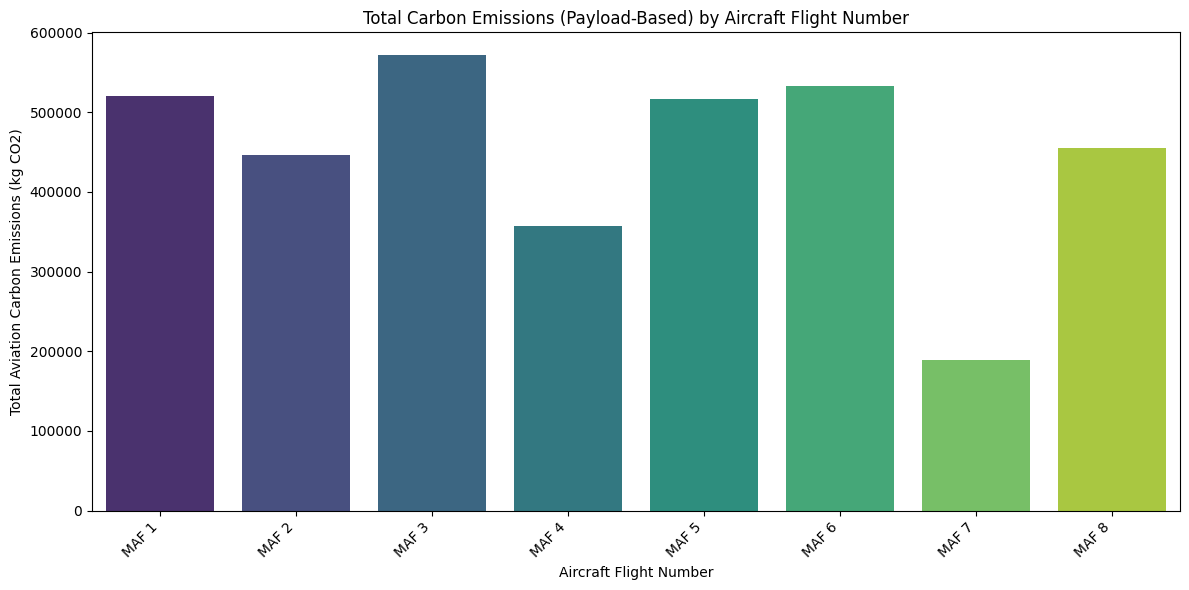

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.barplot(x='AirCraft_FltNo', y='Carbon_Emissions_Payload', data=total_carbon_emissions, palette='viridis')
plt.title('Total Carbon Emissions (Payload-Based) by Aircraft Flight Number')
plt.xlabel('Aircraft Flight Number')
plt.ylabel('Total Aviation Carbon Emissions (kg CO2)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Generate Pie Chart of Carbon Emissions (Payload)

### Subtask:
Create a pie chart showing the distribution of total Carbon_Emissions_Payload across AirCraft_FltNo.

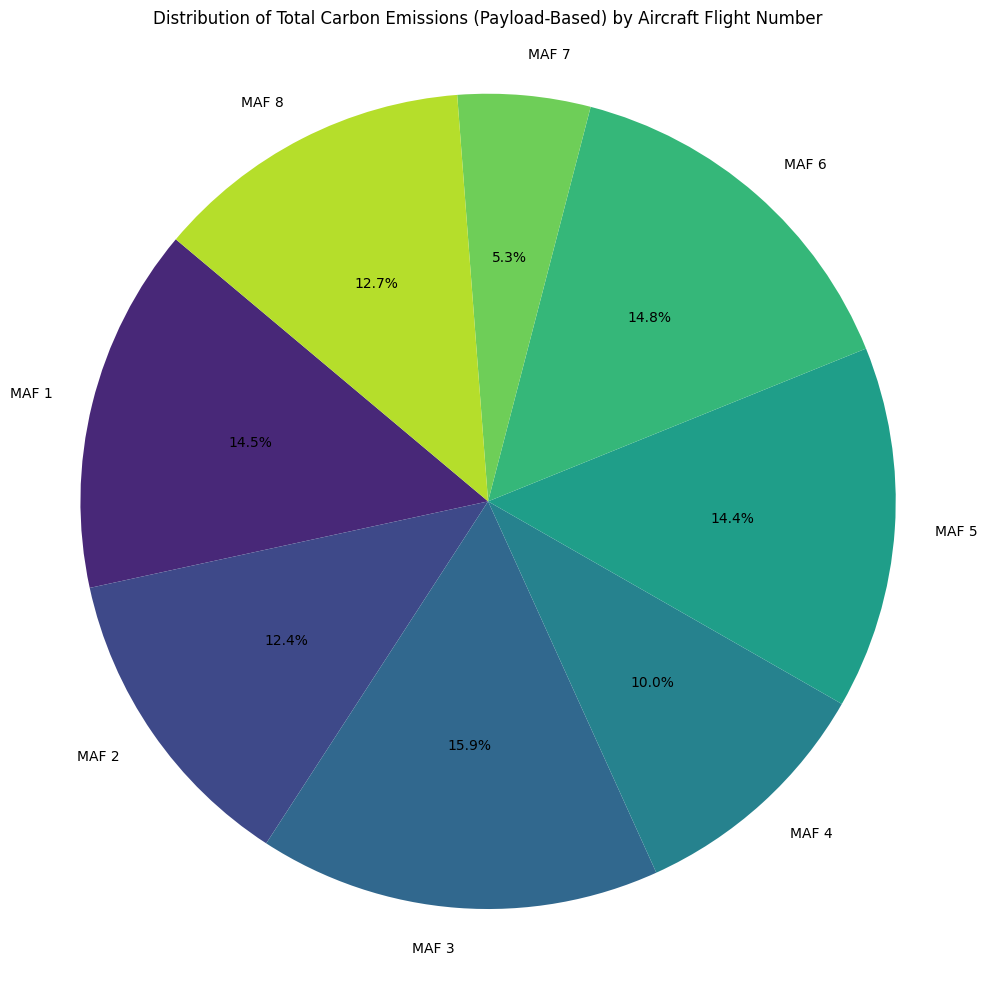

In [60]:
plt.figure(figsize=(10, 10))
plt.pie(total_carbon_emissions['Carbon_Emissions_Payload'], labels=total_carbon_emissions['AirCraft_FltNo'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis', len(total_carbon_emissions)))
plt.title('Distribution of Total Carbon Emissions (Payload-Based) by Aircraft Flight Number')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()

/tmp/ipython-input-61-1132284562.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='AirCraft_FltNo', y='Carbon_Emissions_Time', data=total_carbon_emissions, palette='viridis')


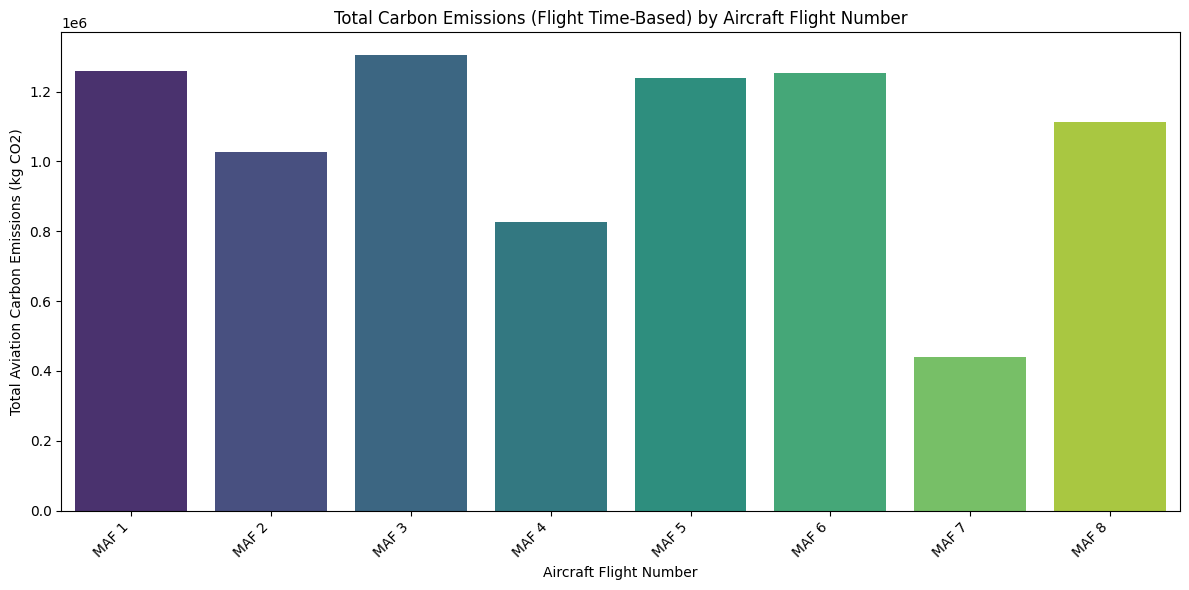

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.barplot(x='AirCraft_FltNo', y='Carbon_Emissions_Time', data=total_carbon_emissions, palette='viridis')
plt.title('Total Carbon Emissions (Flight Time-Based) by Aircraft Flight Number')
plt.xlabel('Aircraft Flight Number')
plt.ylabel('Total Aviation Carbon Emissions (kg CO2)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

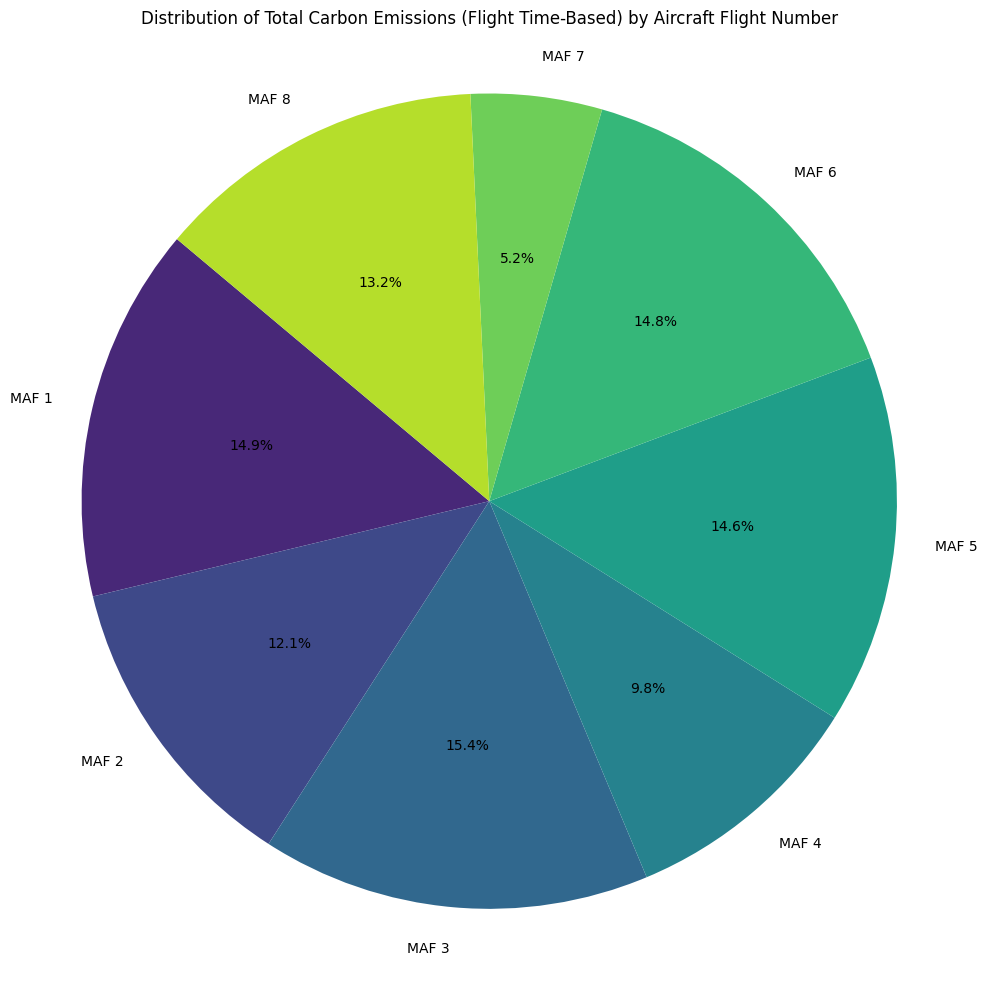

In [62]:
plt.figure(figsize=(10, 10))
plt.pie(total_carbon_emissions['Carbon_Emissions_Time'], labels=total_carbon_emissions['AirCraft_FltNo'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis', len(total_carbon_emissions)))
plt.title('Distribution of Total Carbon Emissions (Flight Time-Based) by Aircraft Flight Number')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()

ARIMA model
This code is run in Anaconda Envirnment

In [ ]:
#pip install pmdarima
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pmdarima import auto_arima
import warnings

warnings.filterwarnings("ignore")

# --- Data Loading from GitHub ---
# Replace the URL below with the raw link to your CSV file on GitHub
github_csv_url = 'https://raw.githubusercontent.com/waswapeter/Adam/main/Prepared_Data_with_FuelBurn.csv'

try:
    data = pd.read_csv(github_csv_url)
    print("Data loaded successfully from GitHub.")
except Exception as e:
    print(f"Error loading data from GitHub: {e}")
    exit()

# --- Data Cleaning and Preparation ---
data['AirCraft_FltNo'] = data['AirCraft_FltNo'].str.strip()
data['Date'] = pd.to_datetime(data['Date'])
data['Year'] = data['Date'].dt.year

# Compute Carbon Emissions
CO2_CONVERSION_FACTOR = 3.16  # Conversion factor for jet fuel (kg CO2 per kg fuel)
data['Carbon_Emissions_Payload'] = data['Fuel_Burn_kg_Payload'] * CO2_CONVERSION_FACTOR
data['Carbon_Emissions_Time'] = data['Fuel_Burn_kg_Time'] * CO2_CONVERSION_FACTOR

# Filter out data from 2020 (if needed for your analysis)
# data_filtered_2020 = data[data['Year'] != 2020].copy()
# Use data_filtered_2020 instead of data in the following steps if you uncomment the above line

# Prepare time series data for both emission types
time_series_payload = {}
time_series_time = {}
unique_flt_nos = data['AirCraft_FltNo'].unique() # Use data if not filtering 2020

for flt_no in unique_flt_nos:
    # Use data_filtered_2020 if you uncommented the filtering step
    filtered_ts_payload = data[data['AirCraft_FltNo'] == flt_no][['Date', 'Carbon_Emissions_Payload']].sort_values(by='Date').set_index('Date')
    time_series_payload[flt_no] = filtered_ts_payload

    # Use data_filtered_2020 if you uncommented the filtering step
    filtered_ts_time = data[data['AirCraft_FltNo'] == flt_no][['Date', 'Carbon_Emissions_Time']].sort_values(by='Date').set_index('Date')
    time_series_time[flt_no] = filtered_ts_time

# --- ARIMA Model Selection and Fitting ---
fitted_models_payload = {}
fitted_models_time = {}

print("\nFitting ARIMA models for Carbon_Emissions_Payload:")
for flt_no, ts_data in time_series_payload.items():
    if not ts_data.empty:
        print(f"  Processing {flt_no}...")
        # Convert index to datetime if it's not already (should be done already, but good practice)
        if not isinstance(ts_data.index, pd.DatetimeIndex):
            ts_data.index = pd.to_datetime(ts_data.index)

        # Resample data to a regular frequency (e.g., daily 'D') and interpolate
        ts_data_resampled = ts_data.resample('D').mean().interpolate(method='linear')

        # Check if there is enough data after resampling
        if len(ts_data_resampled) > 1:
            try:
                model = auto_arima(ts_data_resampled, seasonal=False, suppress_warnings=True)
                fitted_models_payload[flt_no] = model
                print(f"    Best ARIMA parameters for {flt_no} (Payload): {model.order}")
            except Exception as e:
                print(f"    Could not fit ARIMA model for {flt_no} (Payload): {e}")
        else:
            print(f"    Not enough data after resampling for {flt_no} (Payload) to fit ARIMA.")
    else:
        print(f"  No data available for {flt_no} (Payload) after filtering 2020.")


print("\nFitting ARIMA models for Carbon_Emissions_Time:")
for flt_no, ts_data in time_series_time.items():
    if not ts_data.empty:
        print(f"  Processing {flt_no}...")
        # Convert index to datetime if it's not already (should be done already, but good practice)
        if not isinstance(ts_data.index, pd.DatetimeIndex):
            ts_data.index = pd.to_datetime(ts_data.index)

        # Resample data to a regular frequency (e.g., daily 'D') and interpolate
        ts_data_resampled = ts_data.resample('D').mean().interpolate(method='linear')

        # Check if there is enough data after resampling
        if len(ts_data_resampled) > 1:
            try:
                model = auto_arima(ts_data_resampled, seasonal=False, suppress_warnings=True)
                fitted_models_time[flt_no] = model
                print(f"    Best ARIMA parameters for {flt_no} (Time): {model.order}")
            except Exception as e:
                print(f"    Could not fit ARIMA model for {flt_no} (Time): {e}")
        else:
            print(f"    Not enough data after resampling for {flt_no} (Time) to fit ARIMA.")
    else:
         print(f"  No data available for {flt_no} (Time) after filtering 2020.")

print("\nARIMA model fitting complete.")

# --- Forecasting (Example: forecast for the next 30 days) ---
n_periods = 2190 # Number of periods to forecast

print("\nGenerating Forecasts:")
forecasted_emissions_payload = {}
forecasted_emissions_time = {}

for flt_no, model in fitted_models_payload.items():
    if model:
        try:
            forecast, conf_int = model.predict(n_periods=n_periods, return_conf_int=True)
            forecasted_emissions_payload[flt_no] = {
                'forecast': forecast,
                'conf_int': conf_int
            }
            print(f"  Forecast generated for {flt_no} (Payload).")
        except Exception as e:
            print(f"  Could not generate forecast for {flt_no} (Payload): {e}")

for flt_no, model in fitted_models_time.items():
    if model:
        try:
            forecast, conf_int = model.predict(n_periods=n_periods, return_conf_int=True)
            forecasted_emissions_time[flt_no] = {
                'forecast': forecast,
                'conf_int': conf_int
            }
            print(f"  Forecast generated for {flt_no} (Time).")
        except Exception as e:
            print(f"  Could not generate forecast for {flt_no} (Time): {e}")

print("\nForecasting complete.")

# --- Displaying Forecasts (Example for one flight number) ---
if unique_flt_nos.size > 0:
    example_flt_no = unique_flt_nos[0]
    print(f"\nExample Forecast for {example_flt_no} (Payload):")
    if example_flt_no in forecasted_emissions_payload:
        print(forecasted_emissions_payload[example_flt_no]['forecast'])
        print("\nConfidence Intervals:")
        print(forecasted_emissions_payload[example_flt_no]['conf_int'])
    else:
        print("  No forecast available.")

    print(f"\nExample Forecast for {example_flt_no} (Time):")
    if example_flt_no in forecasted_emissions_time:
        print(forecasted_emissions_time[example_flt_no]['forecast'])
        print("\nConfidence Intervals:")
        print(forecasted_emissions_time[example_flt_no]['conf_int'])
    else:
         print("  No forecast available.")
else:
    print("\nNo flight numbers to display forecasts for.")


# --- Optional: Plotting Forecasts (Example for one flight number) ---
if unique_flt_nos.size > 0:
    example_flt_no = unique_flt_nos[0]

    if example_flt_no in fitted_models_payload:
        print(f"\nPlotting forecast for {example_flt_no} (Payload):")
        plt.figure(figsize=(12, 6))
        plt.plot(time_series_payload[example_flt_no], label='Historical Data')
        # Create date index for forecast
        last_date = time_series_payload[example_flt_no].index[-1]
        forecast_index = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=n_periods, freq='D')
        plt.plot(forecast_index, forecasted_emissions_payload[example_flt_no]['forecast'], label='Forecast')
        plt.title(f'Carbon Emissions Forecast (Payload-Based) for {example_flt_no}')
        plt.xlabel('Date')
        plt.ylabel('Carbon Emissions (kg CO2)')
        plt.legend()
        plt.show()
    else:
        print(f"\nCannot plot forecast for {example_flt_no} (Payload) as no model was fitted.")

    if example_flt_no in fitted_models_time:
        print(f"\nPlotting forecast for {example_flt_no} (Time):")
        plt.figure(figsize=(12, 6))
        plt.plot(time_series_time[example_flt_no], label='Historical Data')
        # Create date index for forecast
        last_date = time_series_time[example_flt_no].index[-1]
        forecast_index = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=n_periods, freq='D')
        plt.plot(forecast_index, forecasted_emissions_time[example_flt_no]['forecast'], label='Forecast')
        plt.title(f'Carbon Emissions Forecast (Flight Time-Based) for {example_flt_no}')
        plt.xlabel('Date')
        plt.ylabel('Carbon Emissions (kg CO2)')
        plt.legend()
        plt.show()
    else:
         print(f"\nCannot plot forecast for {example_flt_no} (Time) as no model was fitted.")

In [ ]:
import pandas as pd

# Assuming you have the 'forecasted_emissions_payload' and 'forecasted_emissions_time'
# dictionaries available from your ARIMA forecasting step.
# Also assuming 'time_series_payload' and 'time_series_time' are available
# to get the last date for forecasting index.
# And 'n_periods' is defined for the forecast length.

combined_forecast_data = []

if 'forecasted_emissions_payload' in locals():
    for flt_no, forecast_data in forecasted_emissions_payload.items():
        if forecast_data and flt_no in time_series_payload:
            last_date = time_series_payload[flt_no].index[-1]
            forecast_index = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=n_periods, freq='D')
            for date, value in zip(forecast_index, forecast_data['forecast']):
                combined_forecast_data.append({'AirCraft_FltNo': flt_no, 'Date': date, 'Carbon_Emissions': value, 'Emission_Type': 'Payload'})
else:
    print("Warning: 'forecasted_emissions_payload' not found. Skipping payload data.")


if 'forecasted_emissions_time' in locals():
    for flt_no, forecast_data in forecasted_emissions_time.items():
        if forecast_data and flt_no in time_series_time:
            last_date = time_series_time[flt_no].index[-1]
            forecast_index = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=n_periods, freq='D')
            for date, value in zip(forecast_index, forecast_data['forecast']):
                combined_forecast_data.append({'AirCraft_FltNo': flt_no, 'Date': date, 'Carbon_Emissions': value, 'Emission_Type': 'Time'})
else:
     print("Warning: 'forecasted_emissions_time' not found. Skipping time-based data.")


if combined_forecast_data:
    forecasted_df = pd.DataFrame(combined_forecast_data)

    # Save the DataFrame to a CSV file
    forecasted_df.to_csv('C:/Users/pw174/Documents/Other_People/Adam_data/forecasted_carbon_emissions.csv', index=False)

    print("Forecasted carbon emissions data saved to 'forecasted_carbon_emissions.csv'")
    display(forecasted_df.head())
else:
    print("No forecast data available to save.")